Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothne

C:\Users\Alen Jose\AppData\Local\Temp\ipykernel_30116\1880960376.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='viridis')


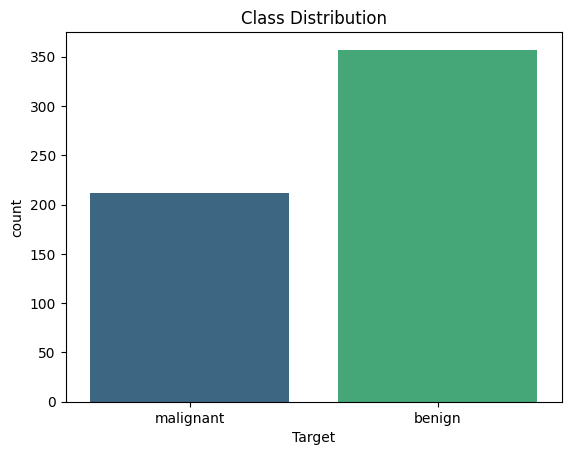

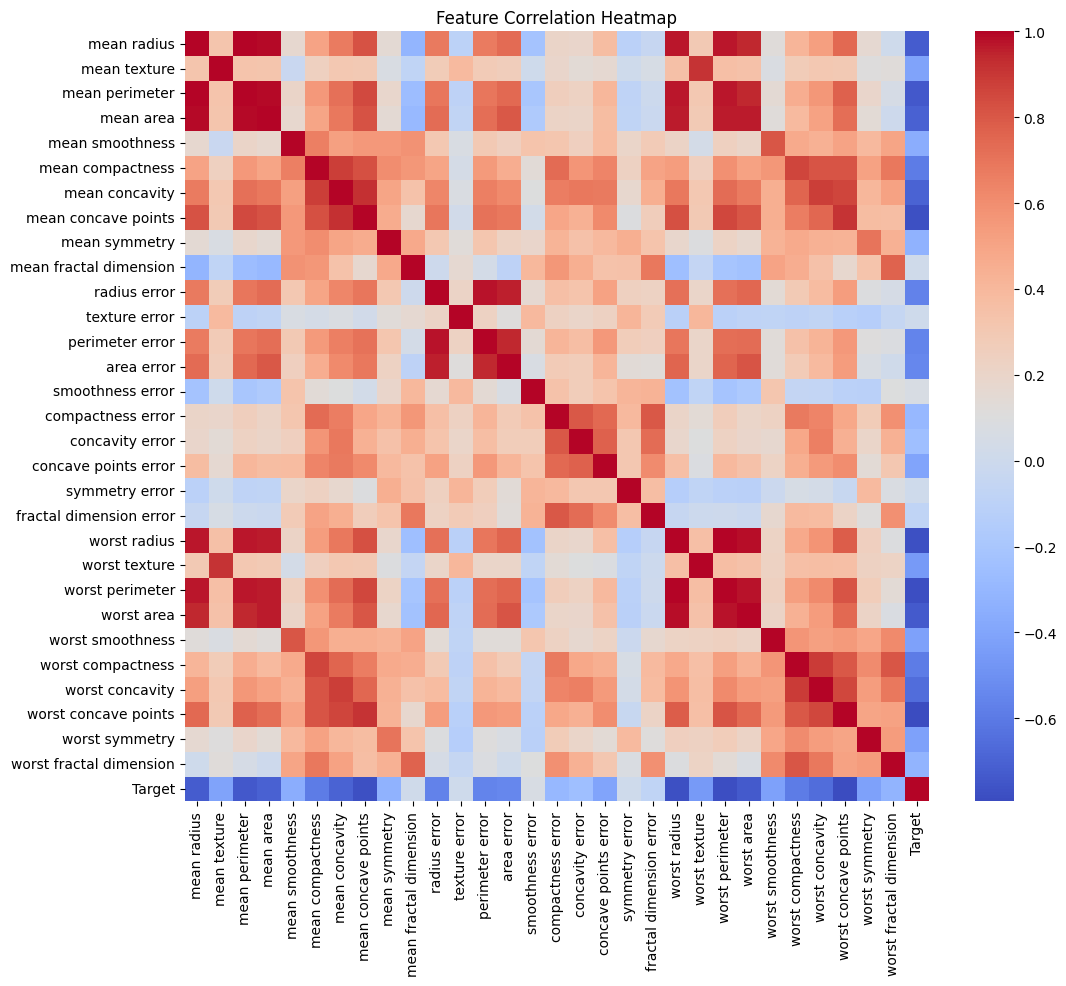

Highly Correlated Feature Pairs:
('mean radius', 'mean perimeter', 0.9978552814938109)
('mean radius', 'mean area', 0.9873571700566127)
('mean radius', 'worst radius', 0.9695389726112055)
('mean radius', 'worst perimeter', 0.9651365139559871)
('mean radius', 'worst area', 0.9410824595860461)
('mean texture', 'worst texture', 0.912044588840421)
('mean perimeter', 'mean area', 0.9865068039913907)
('mean perimeter', 'worst radius', 0.9694763634663146)
('mean perimeter', 'worst perimeter', 0.9703868870426394)
('mean perimeter', 'worst area', 0.9415498080023068)
('mean area', 'worst radius', 0.9627460860470841)
('mean area', 'worst perimeter', 0.9591195743552645)
('mean area', 'worst area', 0.9592133256498998)
('mean concavity', 'mean concave points', 0.9213910263788588)
('mean concave points', 'worst concave points', 0.9101553142985918)
('radius error', 'perimeter error', 0.9727936770160764)
('radius error', 'area error', 0.951830112110991)
('perimeter error', 'area error', 0.9376554069544

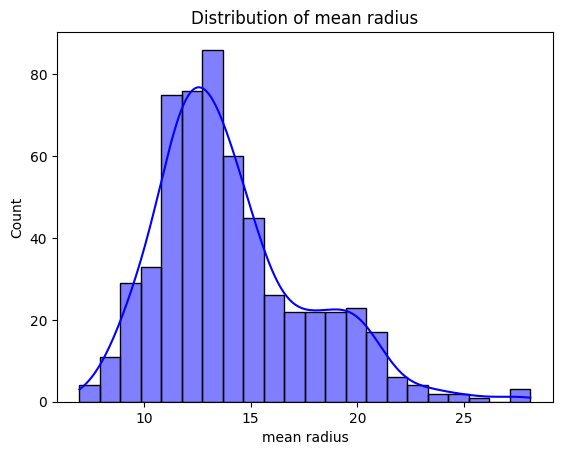

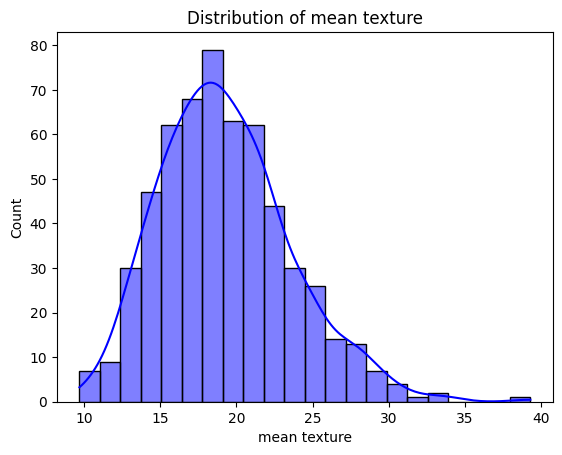

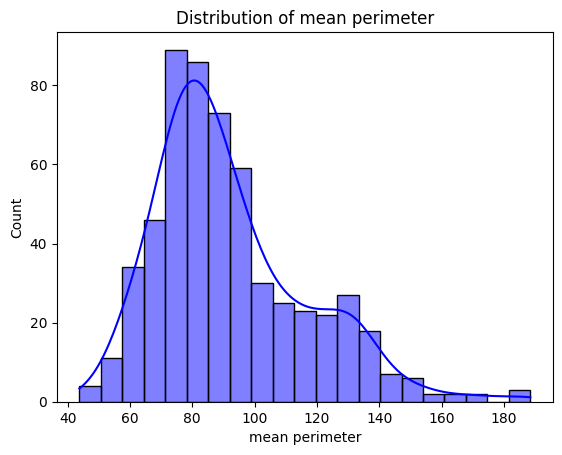

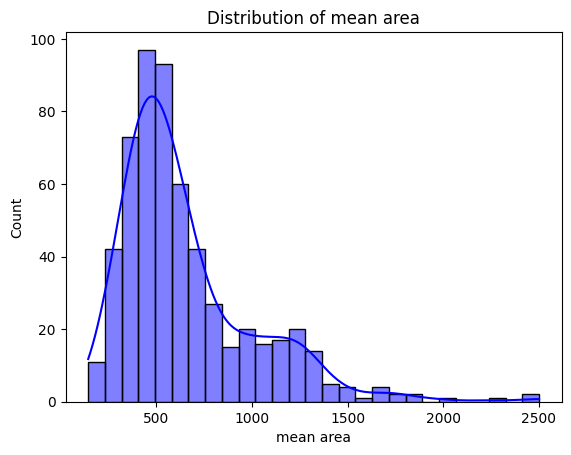

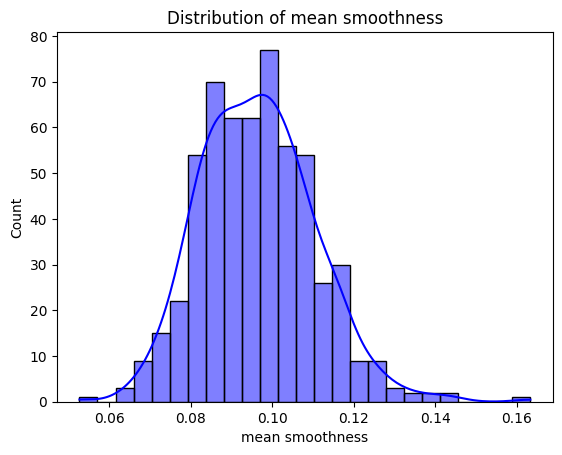

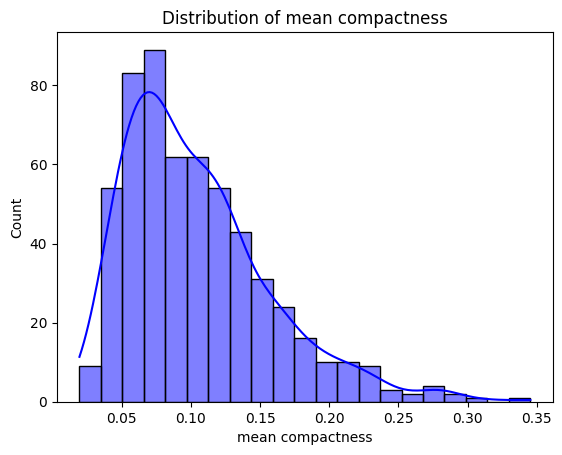

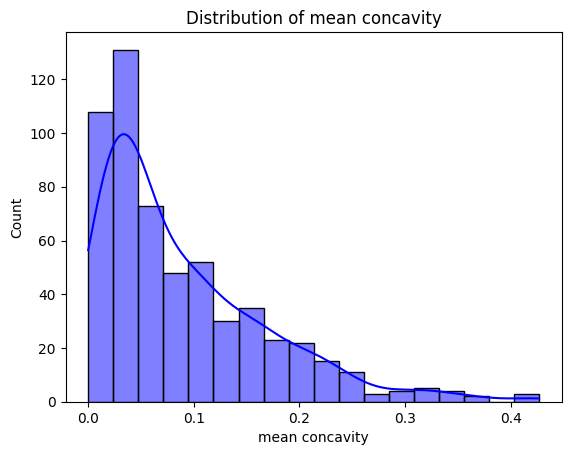

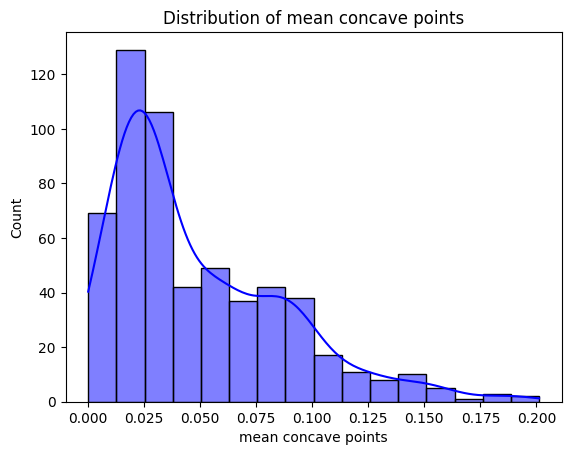

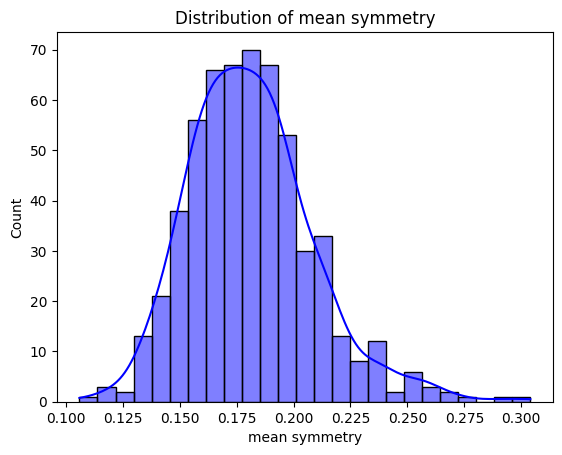

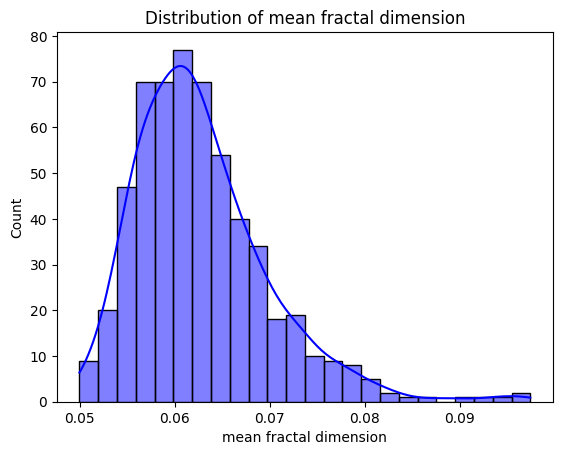

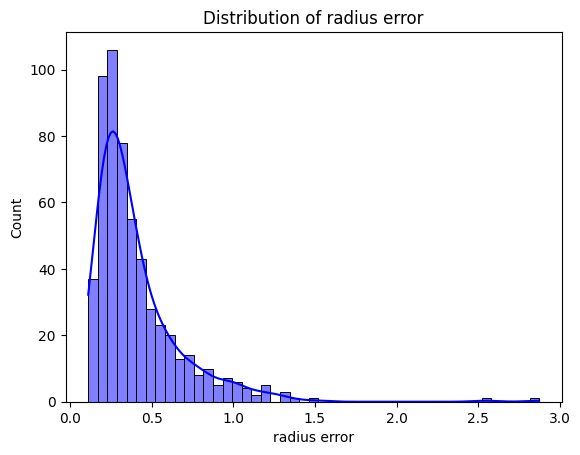

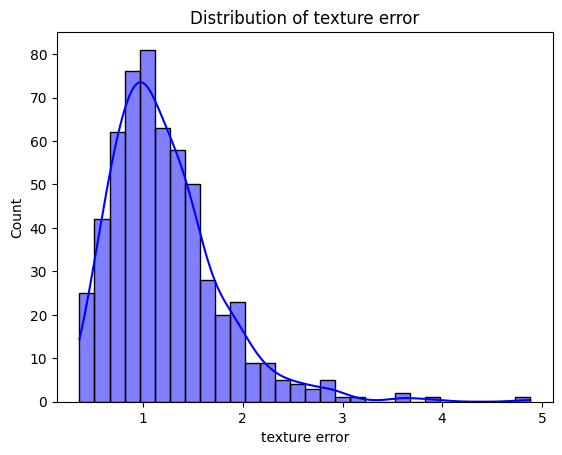

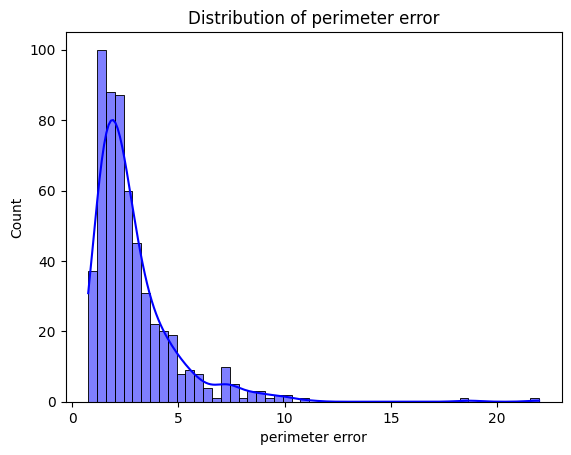

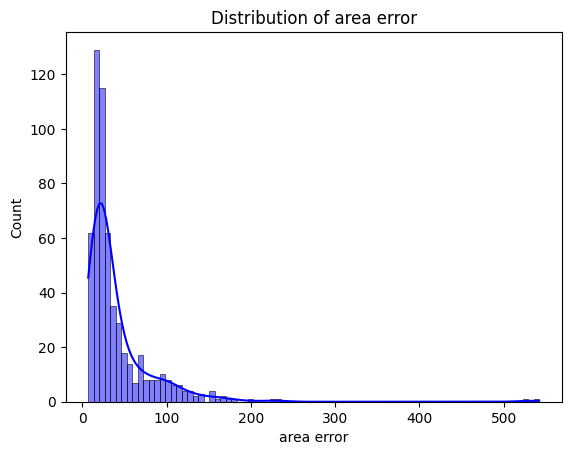

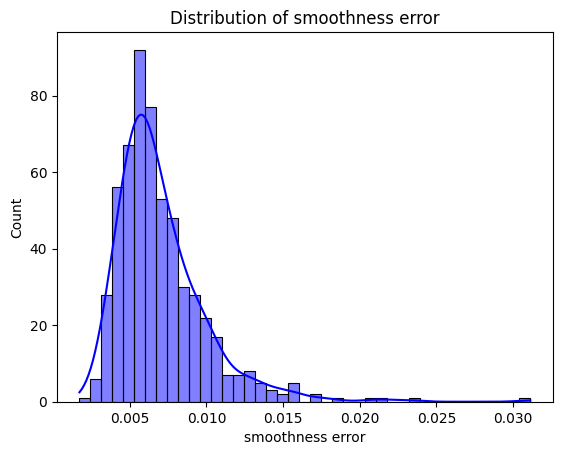

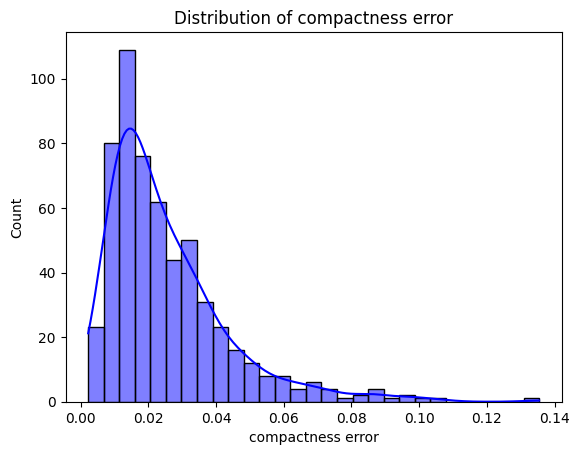

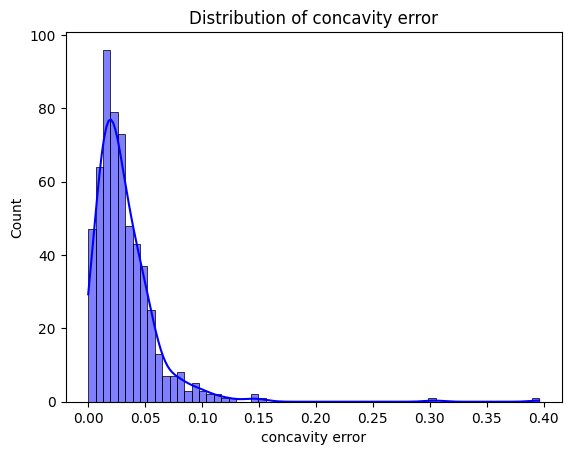

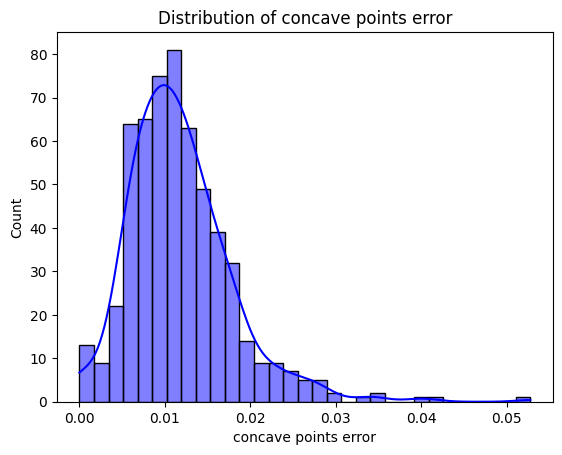

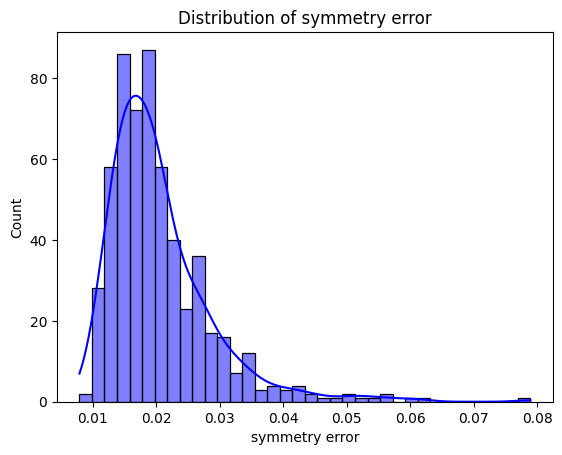

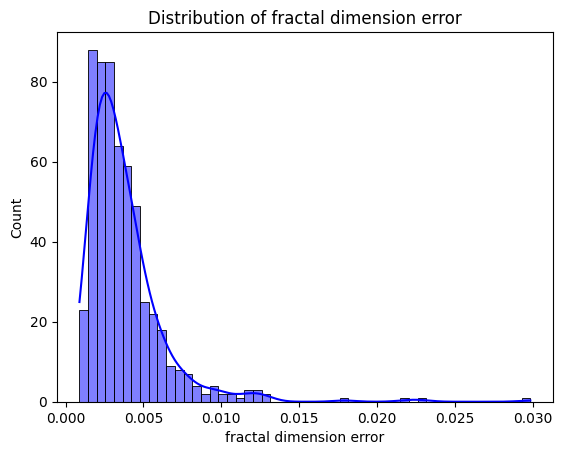

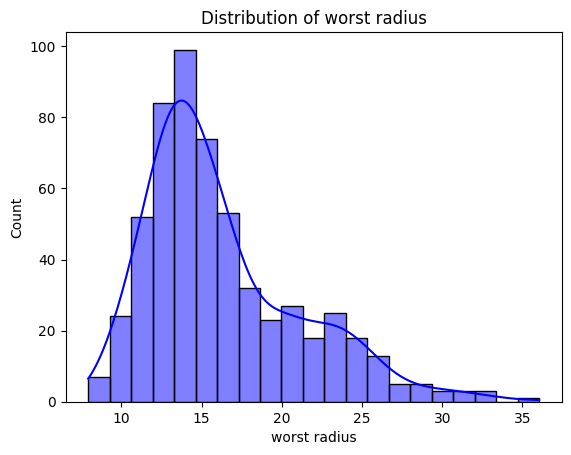

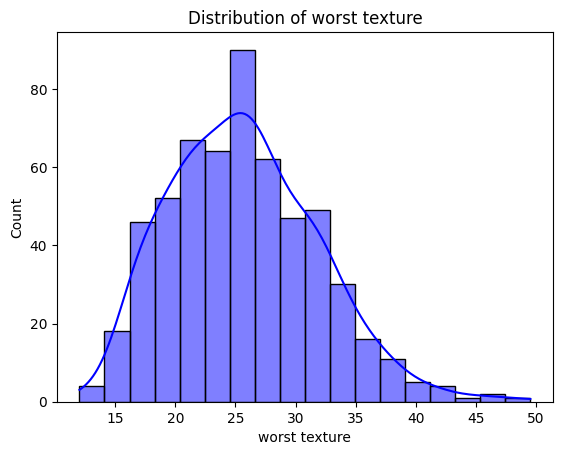

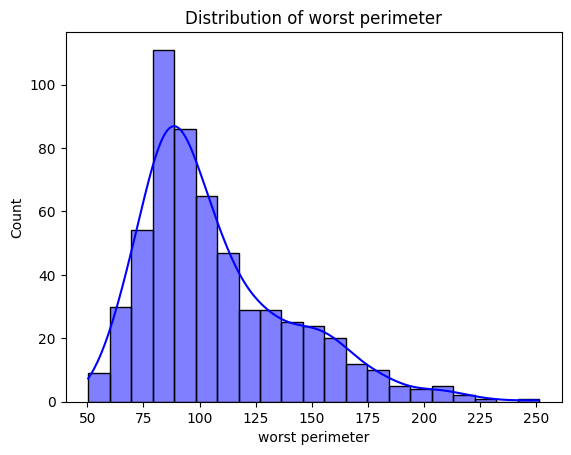

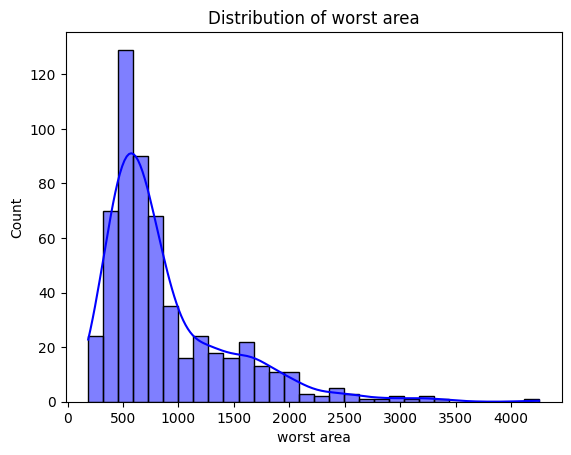

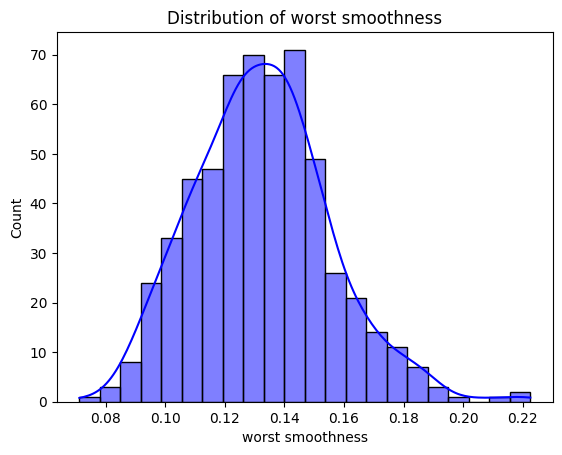

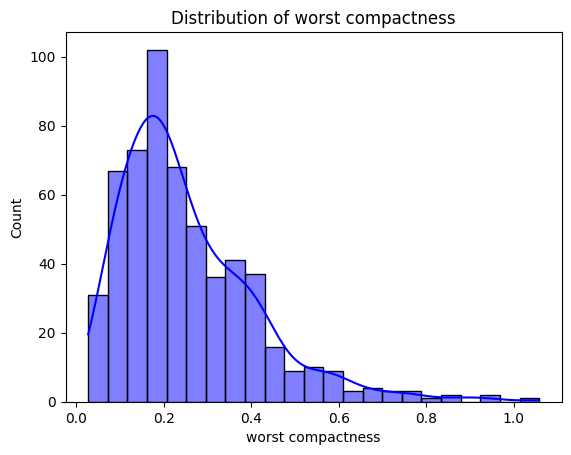

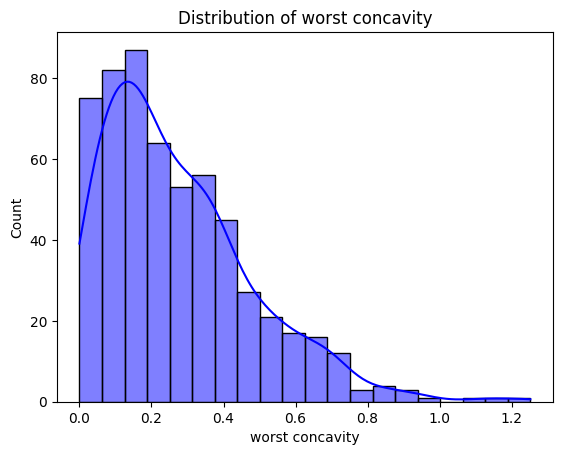

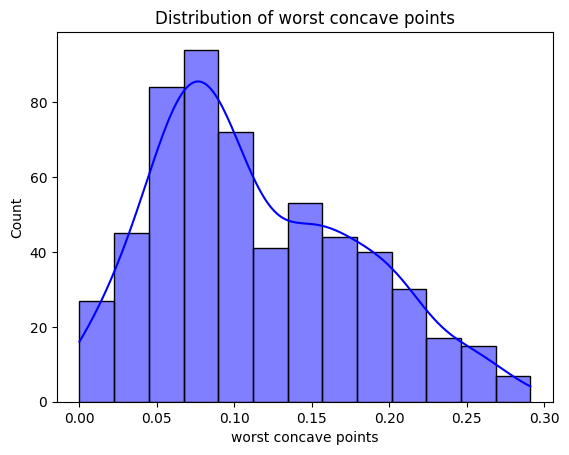

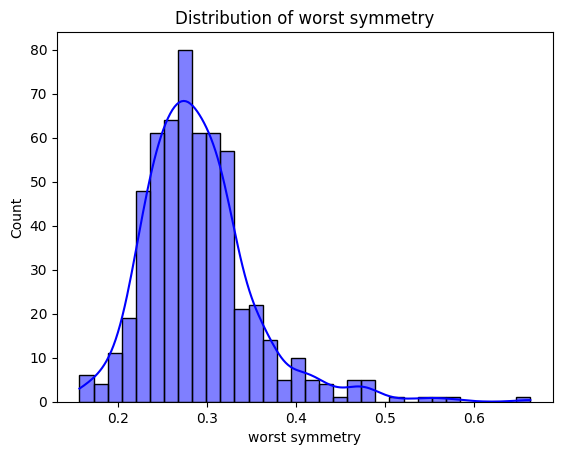

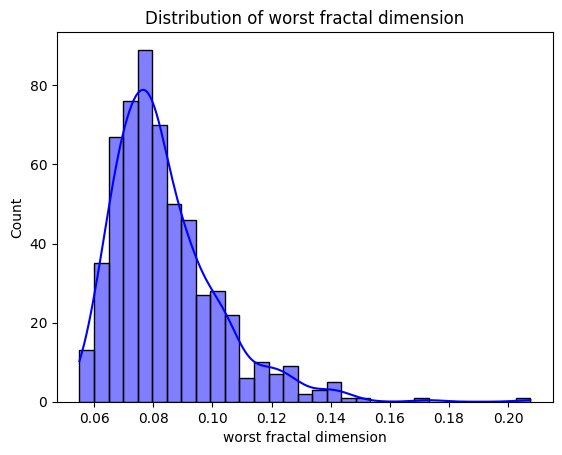

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

missing_values = df.isnull().sum().sum()
print(f"\nMissing Values in the Dataset: {missing_values}")


print("\nClass Distribution:")
print(df['Target'].value_counts())


sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=target_names)
plt.show()

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

high_corr_pairs = [
    (feature_names[i], feature_names[j], correlation_matrix.iloc[i, j])
    for i in range(len(feature_names))
    for j in range(i + 1, len(feature_names))
    if abs(correlation_matrix.iloc[i, j]) > 0.9
]

print("Highly Correlated Feature Pairs:")
for pair in high_corr_pairs:
    print(pair)


for col in df.columns[:-1]:
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred))
    results[name] = clf.score(X_test, y_test)



Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Random Forest:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg     

In [6]:

for name, score in results.items():
    print(f"{name}: Accuracy = {score:.4f}")


best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)

print(f"\nBest Performing Model: {best_model} with accuracy {results[best_model]:.4f}")
print(f"Worst Performing Model: {worst_model} with accuracy {results[worst_model]:.4f}")


Logistic Regression: Accuracy = 0.9737
Decision Tree: Accuracy = 0.9386
Random Forest: Accuracy = 0.9649
SVM: Accuracy = 0.9737
k-NN: Accuracy = 0.9474

Best Performing Model: Logistic Regression with accuracy 0.9737
Worst Performing Model: Decision Tree with accuracy 0.9386
